In [134]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [135]:
from sklearn.datasets import load_boston

boston = load_boston()

/home/pollis/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing data

In [140]:
df_x=pd.DataFrame(boston.data[:,7]) #DIS DATA
df_y = pd.DataFrame(boston.data[:,5]) #RM DATA

In [ ]:
''' Variables in order:
 CRIM     per capita crime rate by town
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX      nitric oxides concentration (parts per 10 million)
 RM       average number of rooms per dwelling
 AGE      proportion of owner-occupied units built prior to 1940
 DIS      weighted distances to five Boston employment centres
 RAD      index of accessibility to radial highways
 TAX      full-value property-tax rate per $10,000
 PTRATIO  pupil-teacher ratio by town
 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 LSTAT    % lower status of the population
 MEDV     Median value of owner-occupied homes in $1000's'''

In [138]:
reg=linear_model.LinearRegression()

In [142]:
x_train,x_test,y_train,y_test = train_test_split(df_x,df_y,test_size=0.3,random_state=4)

In [145]:
#Import the Random Forest Regressor 
from sklearn.ensemble import RandomForestRegressor   
  
#Create a Random Forest regressor object from Random Forest Regressor class
RFReg = RandomForestRegressor(n_estimators = 200, random_state = 0)
  
#Fit the random forest regressor with training data represented by X_train and y_train
RFReg.fit(x_train, y_train)

/tmp/ipykernel_96187/3285778117.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFReg.fit(x_train, y_train)


RandomForestRegressor(n_estimators=200, random_state=0)

In [147]:
#Predicted Height from test dataset w.r.t Random Forest Regression
y_predict_rfr = RFReg.predict((x_test))

#Model Evaluation using R-Square for Random Forest Regression
from sklearn import metrics
r_square = metrics.r2_score(y_test, y_predict_rfr)
print('R-Square Error associated with Random Forest Regression is:', r_square)

R-Square Error associated with Random Forest Regression is: -0.05856401868236483


In [ ]:
RM_data = boston.data[:,5] #fila, columna

In [ ]:
DIS_data = boston.data[:,7]


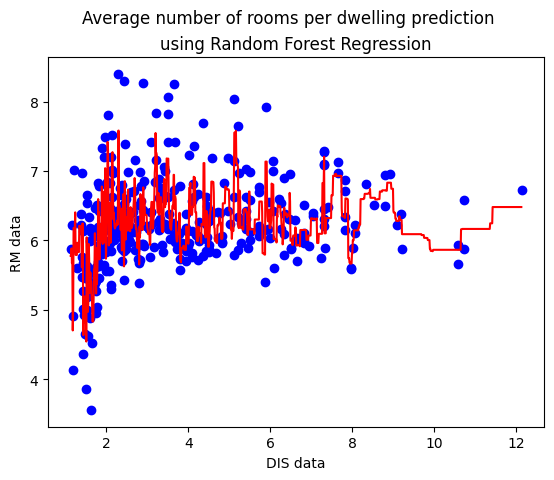

<Figure size 100x100 with 0 Axes>

In [148]:
''' Visualise the Random Forest Regression by creating range of values from min value of X_train to max value of X_train  
having a difference of 0.01 between two consecutive values'''
''' Visualise the Random Forest Regression by creating range of values from min value of X_train to max value of X_train  
having a difference of 0.01 between two consecutive values'''
X_val = np.arange(min(DIS_data), max(DIS_data), 0.01) 
  
#Reshape the data into a len(X_val)*1 array in order to make a column out of the X_val values 
X_val = X_val.reshape((len(X_val), 1))  
  
#Define a scatter plot for training data 
plt.scatter(x_train, y_train, color = 'blue') 
  
#Plot the predicted data 
plt.plot(X_val, RFReg.predict(X_val), color = 'red')  
  
#Define the title 
plt.suptitle('Average number of rooms per dwelling prediction')  

plt.title('using Random Forest Regression')
  
#Define X axis label 
plt.xlabel('DIS data') 
  
#Define Y axis label 
plt.ylabel('RM data') 

#Set the size of the plot for better clarity
plt.figure(figsize=(1,1))
  
#Draw the plot 
plt.show() 

In [144]:
pred = RFReg.predict([[41]])
print("Predicted Height: % d"% pred) 

Predicted Height:  6
